# Изучение закономерностей, определяющих успешность игр

## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы
планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

## Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Предобработка данных

In [1]:
# Импортируем библиотеки для анализа
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Загрузим датасет
games_df = pd.read_csv('datasets/games.csv')
games_df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


После вывода датасета видно, что таблица озаглавлена некорректно. Необходимо перевести заголовки таблицы в нижний регистр.

In [3]:
# Преобразуем заголовки и переведем все символы в строчные
new_titles = []
for title in games_df.columns:
    new_titles.append(title.lower())
    
games_df.columns = new_titles

Выведем информацию о заполненности таблицы и типах данных.

In [4]:
# Выведем информацию о таблице
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице есть несколько колонок с пропусками: `name`, `year_of_release`, `genre`, `critic_score` и `user_score`.<br>
Посчитаем долю пропусков во всех колонках.

In [5]:
# Считаем долю пропусков в колонках
100 - 100 * games_df.count() / games_df.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Наибольшее количество пропусков в колонках `critic_score`, `user_score` и `rating`.

Посмотрим пропуски в колонке `name`.

In [6]:
# Выведем строки с пустыми значениями в колонке 'name'
games_df[games_df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы получили 2 строки, в которых содержатся пропуски в колонках `name` и `genre`. Т.к. подобных строк не много, то можно удалить их из датасета.

In [7]:
# Удалим 2 строки с пропусками
games_df.dropna(subset=['name'], inplace=True)

Изучим пропуски в колонке `year_of_release`.

In [8]:
# Выведем строки с пустыми значениями в колонке 'name'
games_df[games_df['year_of_release'].isna()].head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


У некоторых игр в названии указан год, как правила это игры которые выходили в конце предшествующего указанному году в названии.<br>
Создадим формулу, которая найдет подобные названия и поеределит год выхода игры на основании указанного в названии года. Важно учесть, что год может быть указан в конце названия, как в формате '2006', так и в формате '06'.

In [9]:
# Создадим формулу, которая определяет указан ли год в названии игры и сохраняет на его основании год выхода игры
def get_year_from_name(name):
    last_part = name[-4:]
    if last_part.isdigit():
        if int(last_part) in range(1980, 2016):
            return int(last_part) - 1
    else:
        try:
            delimiter = last_part[-3]
        except:
            return np.nan
        last_part = last_part[-2:]
        if last_part.isdigit() and delimiter == ' ':
            if int(last_part[0]) >= 2:
                last_part = '19' + str(last_part)
            else:
                last_part = '20' + str(last_part)
            if int(last_part) in range(1980, 2016):
                return int(last_part) - 1
    return np.nan

# Применим функцию к новой колонке
games_df['year_in_name'] = games_df[games_df['name'].notna()]['name'].apply(get_year_from_name)

In [10]:
# Посчитаем количество строк, для которых мы получили год выпуска
games_df[games_df['year_in_name'].notna() & games_df['year_of_release'].isna()]['year_in_name'].count()

20

Получилось всего 20 строк. Заменим пропуски в колонке `year_of_release` полученными значениями из колонки `year_in_name`.

In [11]:
# Заменяем пропуски в годе выпуска игры
games_df['year_of_release'].fillna(games_df['year_in_name'])

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16713, dtype: float64

Преобразуем год выпуска игры из `float` в `int`.

In [12]:
# Поменяем год выхода игры из типа 'float' в тип 'Int64'
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')

В колонках `critic_score` и `user_score` имеется большое количество пропусков. Можно предположить, что оценка критиков коррелирует с объемом продаж, а оценка критиков и пользователей коррелируют между собой.

Для начала необходимо преобразовать значения колонки `user_score` в формат `float`. Для этого надо избавиться от значений `tbd`.<br>
Google выдает следующую информацию об аббревиатуре `tbd`: она рассшифровывается, как 'To Be Determined', т.е. рейтинг еще не определен. Подобные значения можно заменить на `NaN`.

In [13]:
# Заменим 'tbd' на 'NaN'
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)


# Преобразуем колонку 'user_score' в тип данных float
games_df['user_score'] = games_df['user_score'].astype('float')

In [14]:
# Создадим колонку с общей суммой продаж
games_df['all_sales'] = (
    games_df['na_sales'] + games_df['eu_sales'] 
    + games_df['jp_sales'] + games_df['other_sales']
)

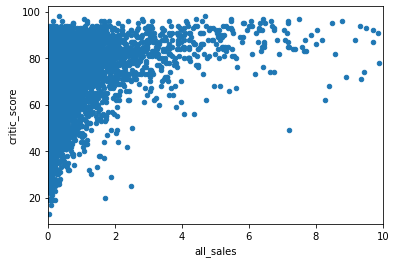

In [15]:
# Построим диаграмму рассеяния между общими продажами и оценкой критиков
games_df.plot(kind='scatter', x='all_sales', y='critic_score', xlim=(0, 10))
plt.show()

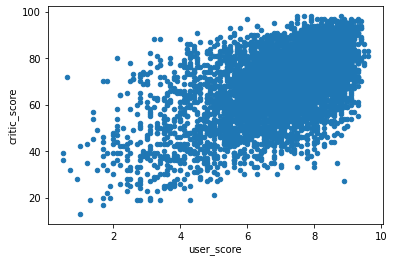

In [16]:
# Построим диаграмму рассеяния между оценкой критиков и оценкой пользователей
games_df.plot(kind='scatter', x='user_score', y='critic_score')
plt.show()

In [17]:
# Посчитаем коэффициент корреляции
games_df[['critic_score', 'user_score']].corr()

,critic_score,user_score
critic_score,1.000000,0.580878
user_score,0.580878,1.000000


Диаграммы рассеяния показали, что между оценкой критиков и объемом продаж присутствует зависимость. Она не означает, что у игр с высоким объемом продаж только высокие рейтинги - у таких игр имеются и довольно низкие рейтинги, но чем больше объем продаж, тем вероятнее получить высокую оценку критиков.<br>
Между оценками критиков и пользователей прослеживается достаточно сильная положительная корреляция. Чем выше оценка критиков, тем, как правило, выше и оценка пользователей.

Исходя из полученных данных вполне можно было бы заменить пропуски в оценках критиков и пользователей на основании объема продаж, но есть риск исказить общую картину, т.к. нам придется усреднять значения, а разброс оценок только увеличивается с увеличением объемов продаж.

Избавимся от пропусков в колонке `rating`. Заменим пропуски для отсутствующего рейтинга на `unknown`, что позволит нам  в дальнейшем учесть игры с пропущенным рейтингом в анализе.

In [18]:
# Заменим пропуски на 'unknown'
games_df['rating'].fillna('unknown', inplace=True)

Поменяем типы данных там, где это нужно.

In [19]:
# Переведем колонки 'platform', 'genre' и 'rating' в тип 'category'
games_df['platform'] = games_df['platform'].astype('category')
games_df['genre'] = games_df['genre'].astype('category')
games_df['rating'] = games_df['rating'].astype('category')

### Выводы

На данном этапе были проведены основные операции по предобработке данных:
- скорректированы заголовки таблицы
- была произведена замена пропусков в колонках `year_of_release` и `rating`
- мы избавились от строк с пропущенными значениями в колонке `name`
- произвели замену типа данных в колонках `platform`, `genre`, `rating`

## Исследовательский анализ данных

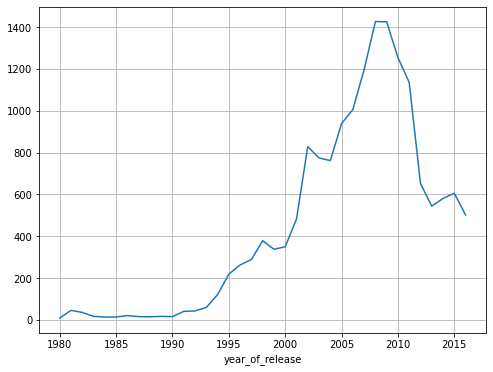

In [20]:
# Посмотрим, сколько игр выпускалось в разные годы
games_df.groupby('year_of_release')['year_of_release'].count().plot(figsize=(8, 6), grid=True)
plt.show()

Активный рост выпуска новых игр приходится на период с 2000 по 2008 год. С 2010 года заметен спад в количестве выпускаемых игр.

In [21]:
# Выберем топ-10 платформ с наибольшими суммарными продажами
top_platforms = games_df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10).index

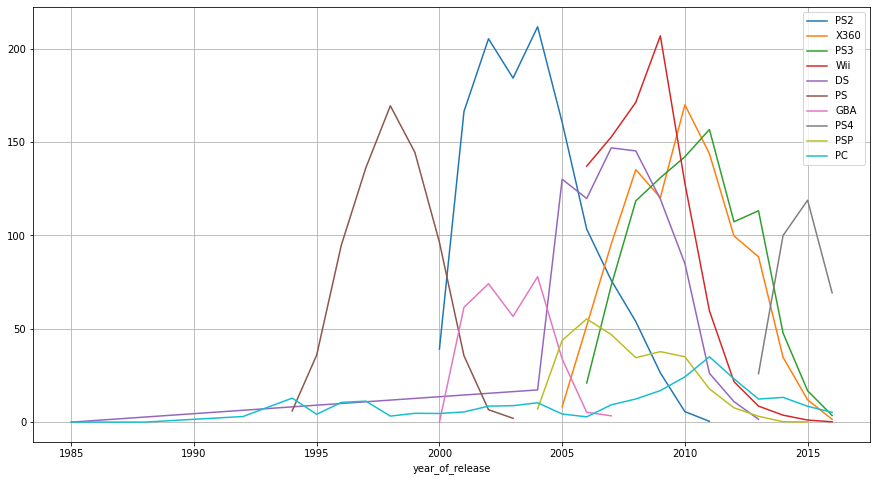

In [22]:
# Построим распределение по годам
for platform in top_platforms:
    games_df.query("platform == @platform").groupby('year_of_release')['all_sales'].sum().plot(label=platform, figsize=(15,8), grid=True)
plt.legend()
plt.show()

На графике мы видим, как некоторые платформы появлялись и исчезали из продаж. В период с 1994 по 2005 заметна первая волна появления новых платформ и их исчезновения с рынка, например такие платформы, как: PS, GBA, PS2. С 2004 по 2012 заметно появление новых платформ, которые ближе к 2010-2012 году достигают пика по объему выпущенных игр (Wii, X360, PS3, PSP, DS). С 2010 года количество выпускаемых игр в год начинает уменьшаться.

Посчитаем средний срок жизни платформ. Создадим сводную таблицу и рассчитаем разницу лет и среднее значение разницы.

In [23]:
# Создадим сводную с минимальной и максимальной датой релиза по каждой платформе
living_years = games_df.pivot_table(index='platform', values='year_of_release', aggfunc={'min', 'max'})

# Вычтем из максимальной даты релиза минимальную - получим количество лет жизни платформы
living_years['living_years'] = living_years['max'] - living_years['min']

print('Средний срок жизни платформ: {} лет'.format(round(living_years['living_years'].mean(), 2)))

Средний срок жизни платформ: 7.61 лет


Для дальнейшего анализа примем период с 2014 года, как наиболее актуальный и показывающий текущую тенденцию в области выпуска и продаж игр.

In [24]:
# Создадим срез по данным с 2010 года
games_actual_df = games_df[games_df['year_of_release'] >= 2014]
games_actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_in_name,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,NaN,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,NaN,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,NaN,0.01


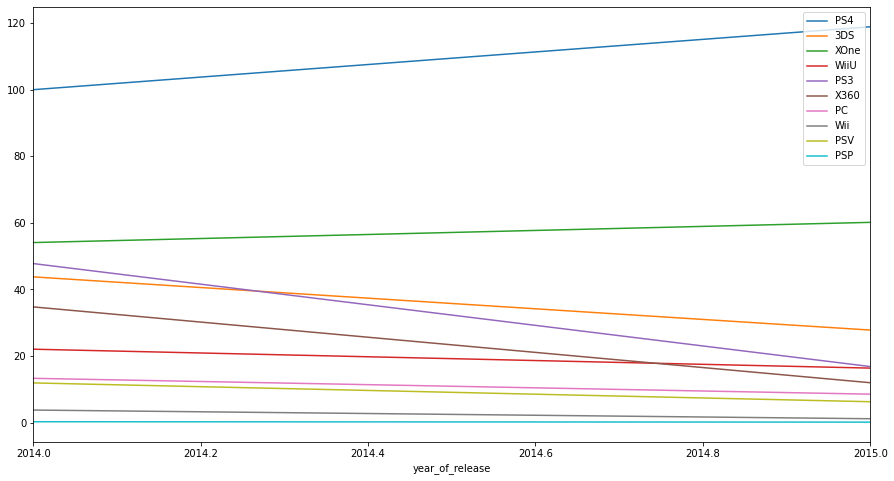

In [25]:
# Построим графики по объему продаж для каждой платформы
for platform in games_actual_df['platform'].unique():
    games_actual_df.query("platform == @platform").groupby('year_of_release')['all_sales'].sum().plot(label=platform, figsize=(15,8), xlim=(2014,2015))
plt.legend()
plt.show()

На графике мы отчетливо видим спад продаж таких платформ, как 3DS, X360, PS3. Заметный рост продаж наблюдается у платформ PS4 и XOne - эти платформы можно считать самыми перспективными с точки зрения продаж. У остальных платформ не заметно, как спада, так и роста, они уверенно занимают не большую по объему, но конкретную нишу пользователей.

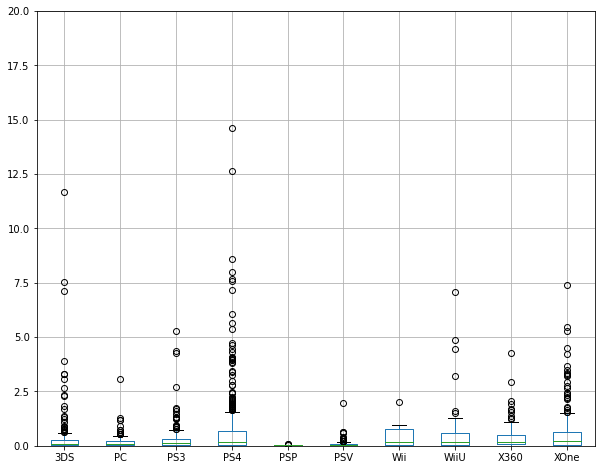

In [26]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
games_actual_df.pivot_table(index='name', columns='platform', values='all_sales').plot(kind='box', figsize=(10, 8), ylim=(0,20), grid=True)
plt.show()

По графикам видно, что больше всего продаж приносят игры вышедшие на платформах 3DS, XOne, PS4.

Увеличим масштаб графиков.

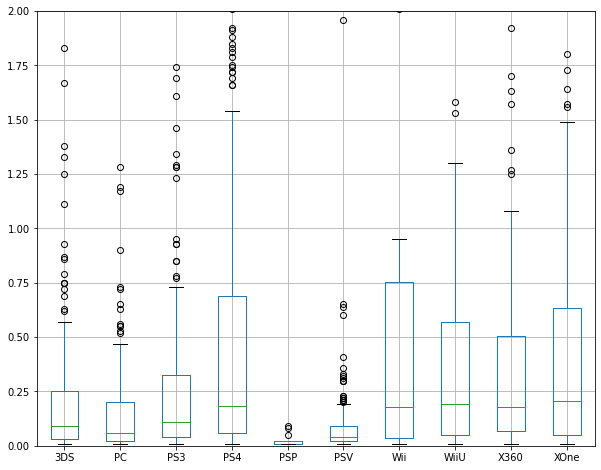

In [27]:
# Приблизим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
games_actual_df.pivot_table(index='name', columns='platform', values='all_sales').plot(kind='box', figsize=(10, 8), ylim=(0,2), grid=True)
plt.show()

Наибольший доверительный интервал значений мы видим у платформ `PS4` и `XOne`, что говорит о наличии большого количества игр среди этих платформ, которые приносят высокие уровни продаж  
Практически на одном уровне находятся медианные значения у платформ `PS4`, `Wii`, `WiiU`, `X360` и `XOne` - около половины игр на этих платформах дают не менее 0.18 млн. продаж с каждой игры.

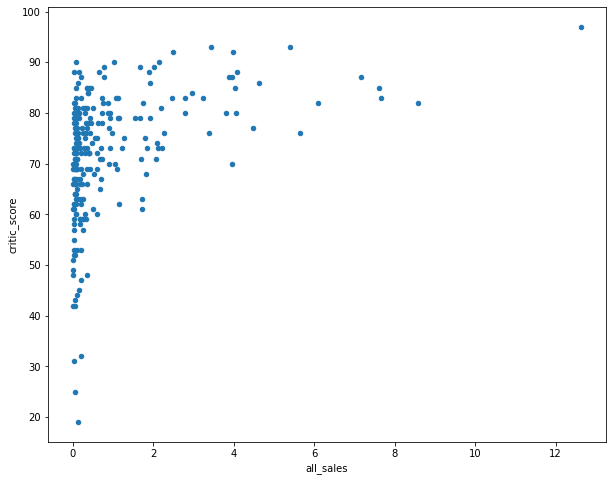

,all_sales,critic_score
all_sales,1.000000,0.402661
critic_score,0.402661,1.000000


In [28]:
# Построим матрицу рассеяния между отзывами критиков и продажами для платформы PS4
games_actual_df.query('platform == "PS4"').plot(kind='scatter', x='all_sales', y='critic_score', figsize=(10, 8))
plt.show()

# Посчитаем корреляцию
games_actual_df.query('platform == "PS4"')[['all_sales', 'critic_score']].corr()

На графике видна корреляция между отзывами критиков и продажами. Чем выше оценка критиков, тем выше и объем продаж игр  
Коэффициент корреляции равен 0.4, что не говорит об очень сильной взаимосвязи.

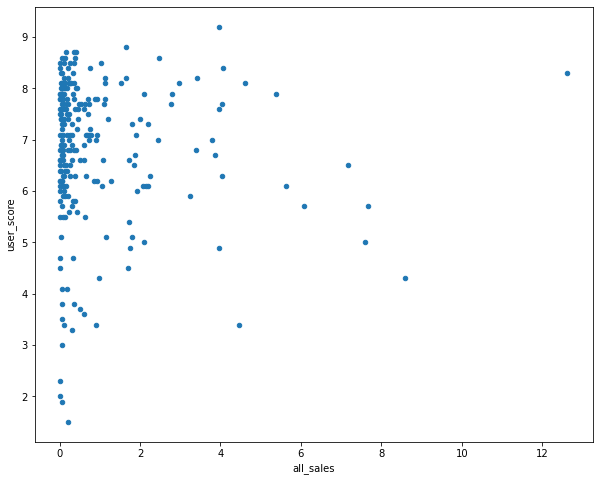

,all_sales,user_score
all_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


In [29]:
# Построим матрицу рассеяния между отзывами пользователей и продажами
games_actual_df.query('platform == "PS4"').plot(kind='scatter', x='all_sales', y='user_score', figsize=(10, 8))
plt.show()

# Посчитаем корреляцию
games_actual_df.query('platform == "PS4"')[['all_sales', 'user_score']].corr()

Между оценками пользователей и продажами взаимосвязь отсутствует, на что указывает и близкий к 0 коэффициент корреляции.

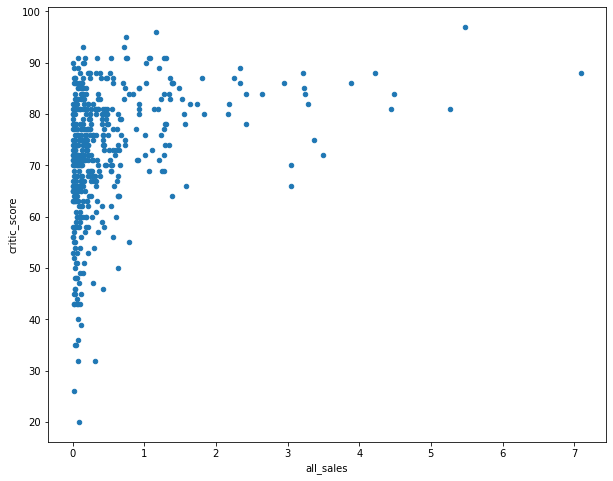

,all_sales,critic_score
all_sales,1.000000,0.309474
critic_score,0.309474,1.000000


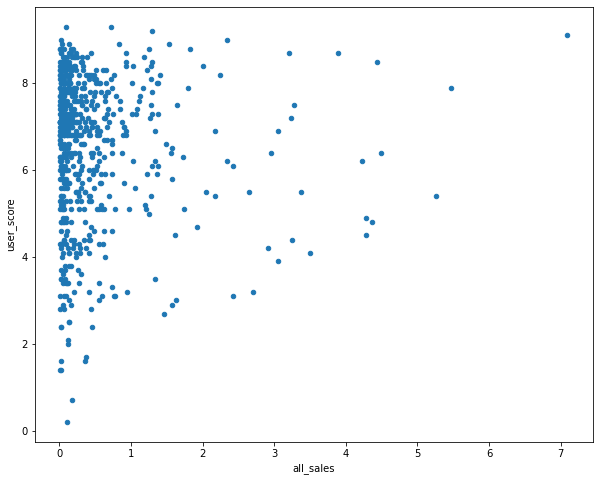

,all_sales,user_score
all_sales,1.000000,-0.023478
user_score,-0.023478,1.000000


In [30]:
# Построим матрицу рассеяния между отзывами критиков и продажами на других платформах
games_actual_df.query('platform != "PS4"').plot(kind='scatter', x='all_sales', y='critic_score', figsize=(10, 8))
plt.show()

# Посчитаем корреляцию
display(games_actual_df.query('platform != "PS4"')[['all_sales', 'critic_score']].corr())

games_actual_df.query('platform != "PS4"').plot(kind='scatter', x='all_sales', y='user_score', figsize=(10, 8))
plt.show()

# Посчитаем корреляцию
games_actual_df.query('platform != "PS4"')[['all_sales', 'user_score']].corr()

Если смотреть данные по остальным платформам, то ситуация отражает полученные результаты - оценки критиков имеют большую корреляцию с продажами, в отличии от пользовательских оценок.

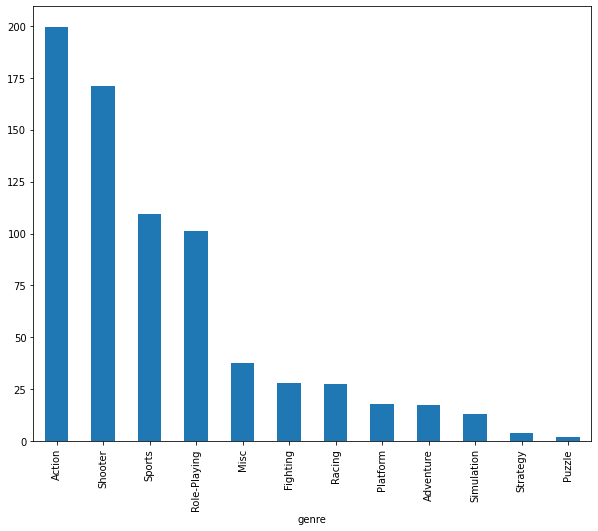

In [31]:
# Построим общее распределение по продажам игр по жанрам
games_actual_df.groupby('genre')['all_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,8))
plt.show()

Самыми продаваемыми являются жанры Action, Shooter, Sports и Role-Playing. Заметна разница между самыми продаваемыми и наименее продаваемыми жанрами - их отличает уровень интеллектуальной нагрузки в процессе игры. Популярнее жанры более активные и динамичные, жанры менее популярные - менее активные  и требуют больше интеллектуального погружения в игру.

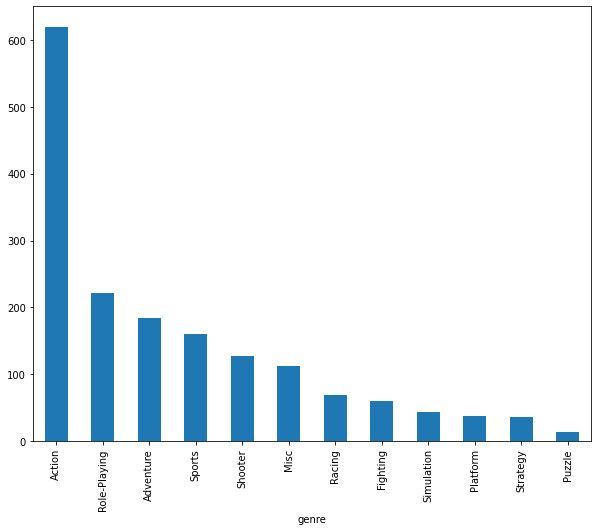

In [32]:
# Построим общее распределение по количеству выпущенных игр по жанрам
games_actual_df.groupby('genre')['all_sales'].count().sort_values(ascending=False).plot.bar(figsize=(10,8))
plt.show()

Больше всего выпущенно игр в жанре Action, что может объяснять и выскоий уровень доохода по этому жанру. Практически на одном уровне по количеству выпущенных игр находятся жанры Misc, Sports, Role-Playing и Adventure, но при этом жанры Sports и Role-Playing занимают одни из лидирующих мест по продажам, что может указывать на наличие нескольких очень популярных игр, которые и приносят большую часть дохода внутри этих жанров.

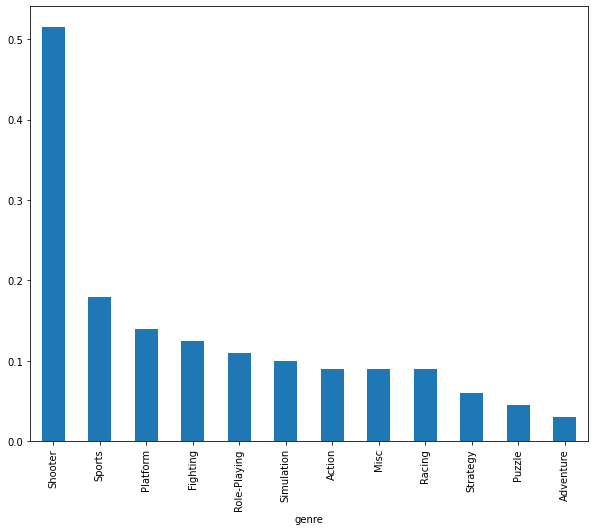

In [33]:
# Построим распределение по медианным значениям, что лучше отразит популярность жанров
games_actual_df.groupby('genre')['all_sales'].median().sort_values(ascending=False).plot.bar(figsize=(10,8))
plt.show()

При обзоре медианных объемов продаж в лидеры вырывается жанр `Shooter`, который лидирует с большим разрывом. Следующими по поулярности идут жанры `Sports`, `Platform` и `Fighting`.

In [34]:
# Определим функцию для вывода топа по различным характеристикам
def show_top(dimension):
    values = ['na_sales', 'eu_sales', 'jp_sales']
    plt.figure(figsize=(20,5))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    axs = [ax1, ax2, ax3]
    
    for index, value in enumerate(values):
        table = (
            games_actual_df.pivot_table(index=dimension, values=value, aggfunc='sum')
            .sort_values(by=value, ascending=False)
            .head(5)
        )
        table['share'] = round(100 * table[value] / table[value].sum(), 2)
        display(table.sort_values(by='share', ascending=False))
        
        # Строим графики
        table['share'].plot.bar(ax=axs[index], sharey=axs[0])
    plt.tight_layout()
    plt.show()

,na_sales,share
platform,,
PS4,98.61,39.00
XOne,81.27,32.14
X360,28.30,11.19
3DS,22.64,8.95
PS3,22.05,8.72


,eu_sales,share
platform,,
PS4,130.04,55.12
XOne,46.25,19.60
PS3,25.54,10.83
PC,17.97,7.62
3DS,16.12,6.83


,jp_sales,share
platform,,
3DS,44.24,47.92
PS4,15.02,16.27
PSV,14.54,15.75
PS3,11.22,12.15
WiiU,7.31,7.92


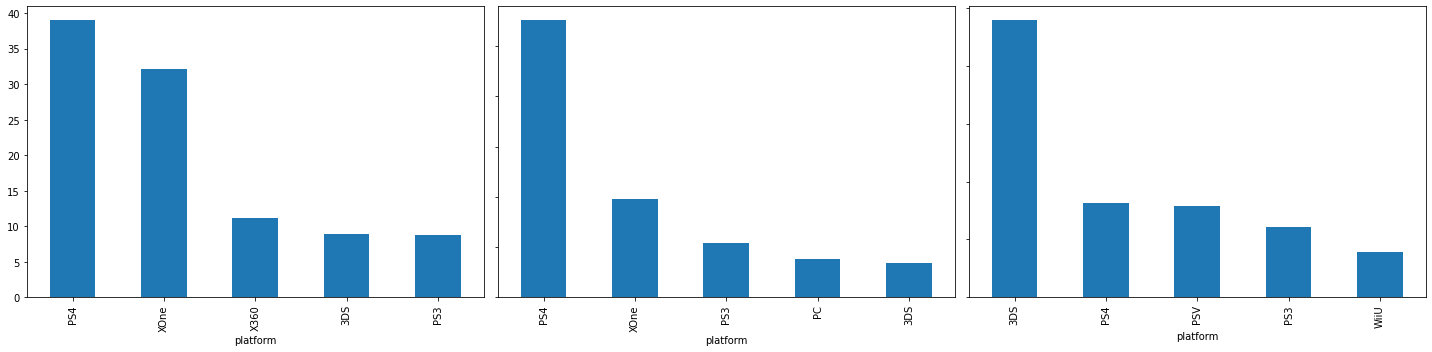

In [35]:
# Выведем топ-5 популярных платформ для региона NA, EU и JP
show_top('platform')

У регионов NA и EU список топовых платформ схожий, у обоих регионов самые популярные платформы `PS4` и `XOne`. В регионе JP в популярных оказались все платформы производством из Японии, а самой популярной оказалась платформа - `3DS` от Nintendo.

,na_sales,share
genre,,
Shooter,79.02,32.10
Action,72.53,29.46
Sports,46.13,18.74
Role-Playing,33.47,13.59
Misc,15.05,6.11


,eu_sales,share
genre,,
Action,74.68,32.72
Shooter,65.52,28.71
Sports,45.73,20.04
Role-Playing,28.17,12.34
Racing,14.13,6.19


,jp_sales,share
genre,,
Role-Playing,31.16,40.16
Action,29.58,38.12
Fighting,6.37,8.21
Misc,5.61,7.23
Shooter,4.87,6.28


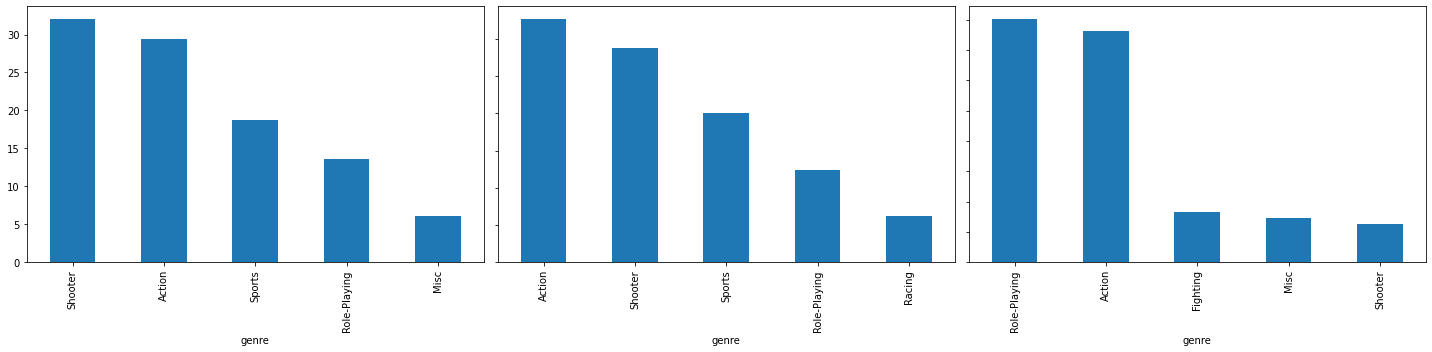

In [36]:
# Выведем топ-5 жанров для региона NA, EU и JP
show_top('genre')

У регионов NA и EU довольно схожие вкусы в жанрах. Популярнее всех в этих регионах жанры Action и Shooter, что отражается и в объемах продаж по этим жанрам. В регионе JP самый популярный жанр Role-Playing.

In [37]:
# Выведем распределение популярных жанров для популярной в регионе JP платформы 3DS
(
    round(100 * (games_actual_df.query('platform == "3DS"')
          .groupby('genre')['jp_sales']
          .sum())
          / (games_actual_df
             .query('platform == "3DS"')['jp_sales']
             .sum())
            , 2)
).sort_values(ascending=False)

genre
Role-Playing    45.64
Action          29.95
Fighting         6.35
Simulation       4.68
Misc             4.63
Platform         2.78
Adventure        2.08
Puzzle           1.40
Sports           1.24
Strategy         1.24
Racing           0.00
Shooter          0.00
Name: jp_sales, dtype: float64

Исходя из таблицы мы видим, что популярность жанра Role-Playing в регионе JP объясняется популярностью платформы 3DS.

,na_sales,share
rating,,
M,96.42,33.94
unknown,64.72,22.78
E,50.74,17.86
T,38.95,13.71
E10+,33.23,11.70


,eu_sales,share
rating,,
M,93.44,34.52
unknown,58.95,21.78
E,58.06,21.45
T,34.07,12.59
E10+,26.16,9.66


,jp_sales,share
rating,,
unknown,56.90,61.12
T,14.78,15.88
E,8.94,9.60
M,8.01,8.60
E10+,4.46,4.79


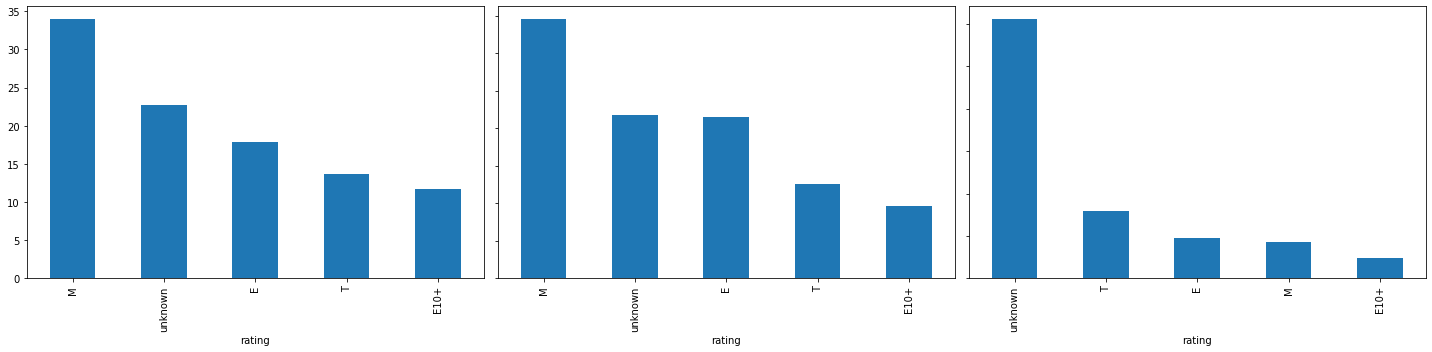

In [38]:
# Выведем топ-5 рейтингов для региона NA, EU и JP
show_top('rating')

Влияние рейтинга сильнее всего заметно в регионах NA и EU - больше всего продаж приходится на игры с рейтингом M, т.е. игры предназначеные для тех, кто старше 18 лет. Но следом за ним идут игры рейтинг которых неизвестен. В регионе JP популярнее всех игры для которых рейтинг был неизвестен. Соответственно мы не можем однозначно утверждать об однозначном влиянии рейтинга на продажи, т.к. мы видим, что большой популярностью пользуются и игры у которых рейтинг отсутствует.

## Статистический анализ данных

Проверим следующую гипотезу : "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Нулевой гипотезой будет являться: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", а альтернативной гипотезой: "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые".

Для проверки гипотез мы будем использовать метод `ttest_ind()` для сравнения средних выборок двух генеральных совокупностей.

In [39]:
# Сравним выборки при помощи теста
alpha = .05

sample_1 = games_actual_df.query("platform == 'XOne' and user_score.notna()")['user_score']
sample_2 = games_actual_df.query("platform == 'PC' and user_score.notna()")['user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var = True)


print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем  гипотезу')
else:
    print('Не можем отвергнуть гипотезу')

p-значение:  0.10450507919348415
Не можем отвергнуть гипотезу


Вероятность получить подобные или большие различия случайно, в случае если верна нулевая гипотеза, равна примерно 10%, что больше нашего порогового значения alpha. Соответственно у нас нет оснований отвергать нулевую гипотезу и мы с большой вероятностью можем считать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим гипотезу : "Средние пользовательские рейтинги жанров Action и Sports разные".

В данном случае нулевой гипотезой будет являться: "Средние пользовательские рейтинги жанров Action и Sports равны", а альтернативной гипотезой: "Средние пользовательские рейтинги жанров Action и Sports не равны".

In [40]:
alpha = .05

sample_1 = games_actual_df.query("genre == 'Action' and user_score.notna()")['user_score']
sample_2 = games_actual_df.query("genre == 'Sports' and user_score.notna()")['user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var = True)


print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не можем отвергнуть гипотезу')

p-значение:  2.8711147985105864e-19
Отвергаем гипотезу


Вероятность получить подобные или большие различия случайно, в случае если нулевая гипотеза верна, сильно меньше нашего порогового значения alpha. Соответственно, мы отвергаем нулевую гипотезу о том, что средние рейтинги равны, что подтверждает изначальную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общие выводы

В ходе исследования были изучены различные параметры влияющие на объем продаж игр и были получены следующие выводы:
- `PS4 и XOne` - самые перспективные платформы с точки зрения продаж;
- больше всего продаж приносят игры вышедшие на платформах `3DS, PS4, XOne`;
- оценки критиков имеет довольно сильную положительную корреляцию с продажами;
- самыми продаваемыми являются жанры `Shooter`, `Sports`, `Platform` и `Fighting`;
- топ-5 платформ в регионе NA: `PS4, XOne, X360, 3DS, PS3`; в регионе EU: `PS4, XOne, PS3, PC, 3DS`; в регионе JP: `3DS, PS4, PSV, PS3, WiiU`;
- топ-5 жанров в регионе NA и EU: `Shooter, Action, Sports, Role-Playing, Misc, Racing`; в регионе JP: `Role-Playing, Action, Fighting, Misc, Shooter`;
- топ-5 игровых рейтинга в регионе NA: `M, E, T, E10+`; в регионе EU: `M, E, T, E10+`; в регионе JP: `T, E, M, E10+`; при этом в этих регионах по объему продаж (1 и 2 место топа) занимают игры, у которых отсутствует рейтинг, что может указывать на отсутствие влияния рейтинга на продажи;
- в регионах NA и EU большей популярностью пользуются игры с рейтингом `M`.